<a href="https://colab.research.google.com/github/AnDDoanf/prediction_projects/blob/master/weather_prediction/FinalMachineLearing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
lst = []
for file in os.listdir('/content/MachineLearning2'):
    if os.path.isfile(os.path.join('/content/MachineLearning2',file)):
        temp = pd.read_csv(os.path.join('/content/MachineLearning2',file))
        lst.append(temp)
df = pd.concat(lst)
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,ha noi,2021-03-01,23.0,18.0,20.6,23.0,18.0,20.6,19.7,95.1,...,20.3,8,NaN,2021-03-01T06:17:05,2021-03-01T18:01:04,0.57,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"48820099999,48823099999,48825099999,4883109999..."
1,ha noi,2021-03-02,21.0,18.7,19.9,21.0,18.7,19.9,12.3,62.6,...,19.0,9,NaN,2021-03-02T06:16:17,2021-03-02T18:01:28,0.60,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
2,ha noi,2021-03-03,19.0,16.8,18.1,19.0,16.8,18.1,14.3,79.1,...,12.1,5,NaN,2021-03-03T06:15:29,2021-03-03T18:01:51,0.64,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"48820099999,48823099999,48825099999,4883109999..."
3,ha noi,2021-03-04,18.8,16.0,17.1,18.8,16.0,17.1,15.4,89.9,...,11.7,5,NaN,2021-03-04T06:14:40,2021-03-04T18:02:14,0.67,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,ha noi,2021-03-05,20.7,17.0,19.2,20.7,17.0,19.2,18.2,93.8,...,20.1,8,NaN,2021-03-05T06:13:51,2021-03-05T18:02:36,0.71,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"48820099999,48823099999,48825099999,4883109999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,ha noi,2022-08-28,35.0,26.5,30.4,44.9,26.5,37.5,26.0,78.5,...,20.4,7,75.0,2022-08-28T05:39:04,2022-08-28T18:16:32,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
28,ha noi,2022-08-29,35.5,27.0,30.7,43.3,31.2,37.7,25.8,76.4,...,25.9,10,60.0,2022-08-29T05:39:20,2022-08-29T18:15:40,0.07,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"48820099999,48823099999,48825099999,4883109999..."
29,ha noi,2022-08-30,35.1,27.0,30.8,42.6,31.2,37.1,25.3,74.3,...,26.4,10,60.0,2022-08-30T05:39:36,2022-08-30T18:14:48,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
30,ha noi,2022-08-31,34.4,27.0,30.5,43.7,30.6,37.5,25.7,76.8,...,23.9,10,60.0,2022-08-31T05:39:52,2022-08-31T18:13:55,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48820099999,48823099999,48825099999,4883109999..."


In [ ]:
features = ["humidity","dew", "cloudcover" , "windspeed", "winddir", "visibility", "uvindex", "conditions", "temp" ]
df = df[features]
df.head()

,humidity,dew,cloudcover,windspeed,winddir,visibility,uvindex,conditions,temp
0,95.1,19.7,94.5,13.0,317.8,3.3,8,"Rain, Overcast",20.6
1,62.6,12.3,86.6,24.1,42.9,9.8,9,"Rain, Partially cloudy",19.9
2,79.1,14.3,92.0,14.8,59.8,7.0,5,"Rain, Overcast",18.1
3,89.9,15.4,91.3,11.2,48.7,5.8,5,"Rain, Overcast",17.1
4,93.8,18.2,95.7,11.2,73.8,2.5,8,"Rain, Overcast",19.2


In [ ]:
df.shape

(744, 9)

In [ ]:
condition_mapping = {
    'Clear': 1,
    'Overcast': 2,
    'Rain': 3,
    'Rain, Overcast': 4,
    'Rain, Partially cloudy': 5,
    'Partially cloudy': 6,
    'Ice pellets': 7,
    'Freezing rain': 8,
    'Thunderstorm': 9
}


# apply the mapping to the 'conditions' column
df['condition_index'] = df['conditions'].map(condition_mapping)

# drop the original 'conditions' column
df.drop('conditions', axis=1, inplace=True)

# print the updated DataFrame
print(df)

    humidity   dew  cloudcover  windspeed  winddir  visibility  uvindex  temp  \
0       95.1  19.7        94.5       13.0    317.8         3.3        8  20.6   
1       62.6  12.3        86.6       24.1     42.9         9.8        9  19.9   
2       79.1  14.3        92.0       14.8     59.8         7.0        5  18.1   
3       89.9  15.4        91.3       11.2     48.7         5.8        5  17.1   
4       93.8  18.2        95.7       11.2     73.8         2.5        8  19.2   
..       ...   ...         ...        ...      ...         ...      ...   ...   
27      78.5  26.0        47.0       19.4    115.9        12.0        7  30.4   
28      76.4  25.8        42.0       17.5    127.7        10.6       10  30.7   
29      74.3  25.3        32.2       13.9    117.2        11.1       10  30.8   
30      76.8  25.7        44.2       12.1     74.6        11.1       10  30.5   
31      83.4  25.5        52.6       17.5    343.1         9.3        9  28.6   

    condition_index  
0    

<ipython-input-4-35d3180b55ab>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition_index'] = df['conditions'].map(condition_mapping)
<ipython-input-4-35d3180b55ab>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('conditions', axis=1, inplace=True)


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                 humidity       dew  cloudcover  windspeed   winddir  \
humidity         1.000000  0.539169    0.480374   0.026095 -0.058558   
dew              0.539169  1.000000    0.056891   0.100760  0.122909   
cloudcover       0.480374  0.056891    1.000000   0.204612 -0.186789   
windspeed        0.026095  0.100760    0.204612   1.000000 -0.153505   
winddir         -0.058558  0.122909   -0.186789  -0.153505  1.000000   
visibility      -0.492980  0.105993   -0.273122   0.208335  0.029601   
uvindex         -0.256127  0.130138   -0.486912  -0.084954  0.116073   
temp             0.106065  0.893032   -0.188708   0.100278  0.182477   
condition_index -0.037845  0.259616   -0.009084   0.077402  0.110725   

                 visibility   uvindex      temp  condition_index  
humidity          -0.492980 -0.256127  0.106065        -0.037845  
dew                0.105993  0.130138  0.893032         0.259616  
cloudcover        -0.273122 -0.486912 -0.188708        -0.009084  
windspeed  

In [ ]:
from sklearn.preprocessing import StandardScaler

# assuming you have a DataFrame called 'df' with the data you want to normalize
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# create a new DataFrame with the normalized data
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)

In [ ]:
df_normalized

,humidity,dew,cloudcover,windspeed,winddir,visibility,uvindex,temp,condition_index
0,1.523699,-0.057362,1.239909,-0.823100,1.871538,-3.070502,0.596074,-0.762499,-0.658251
1,-1.340855,-1.302186,0.911982,1.474281,-0.855370,0.595452,1.007465,-0.896482,0.183225
2,0.113457,-0.965747,1.136135,-0.450552,-0.687728,-0.983728,-0.638098,-1.241007,-0.658251
3,1.065370,-0.780705,1.107078,-1.195648,-0.797836,-1.660520,-0.638098,-1.432410,-0.658251
4,1.409117,-0.309691,1.289721,-1.195648,-0.548853,-3.521696,0.596074,-1.030464,-0.658251
...,...,...,...,...,...,...,...,...,...
739,0.060573,1.002420,-0.731805,0.501516,-0.131237,1.836237,0.184684,1.113251,0.183225
740,-0.124522,0.968777,-0.939354,0.108270,-0.014185,1.046647,1.418856,1.170672,0.183225
741,-0.309616,0.884667,-1.346150,-0.636826,-0.118341,1.328643,1.418856,1.189812,1.024701
742,-0.089266,0.951955,-0.848032,-1.009374,-0.540918,1.328643,1.418856,1.132391,0.183225


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                 humidity       dew  cloudcover  windspeed   winddir  \
humidity         1.000000  0.539169    0.480374   0.026095 -0.058558   
dew              0.539169  1.000000    0.056891   0.100760  0.122909   
cloudcover       0.480374  0.056891    1.000000   0.204612 -0.186789   
windspeed        0.026095  0.100760    0.204612   1.000000 -0.153505   
winddir         -0.058558  0.122909   -0.186789  -0.153505  1.000000   
visibility      -0.492980  0.105993   -0.273122   0.208335  0.029601   
uvindex         -0.256127  0.130138   -0.486912  -0.084954  0.116073   
temp             0.106065  0.893032   -0.188708   0.100278  0.182477   
condition_index -0.037845  0.259616   -0.009084   0.077402  0.110725   

                 visibility   uvindex      temp  condition_index  
humidity          -0.492980 -0.256127  0.106065        -0.037845  
dew                0.105993  0.130138  0.893032         0.259616  
cloudcover        -0.273122 -0.486912 -0.188708        -0.009084  
windspeed  

In [ ]:
from sklearn.model_selection import train_test_split
# Chia tập dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop('temp', axis=1), df_normalized['temp'], t3est_size=0.3, random_state=0)


**Problem 1: Predict Tempurature**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
# Create model
Linear_Regression_model = LinearRegression()
DecisionTreeRegressor_model = DecisionTreeRegressor(random_state=42)
RandomForestRegressor_model = RandomForestRegressor(n_estimators=100, random_state=42)
GradientBoostingRegressor_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
Lasso_model = Lasso(alpha=0.1)
Ridge_model = Ridge(alpha=10000000)
knn = KNeighborsRegressor(n_neighbors=5)


In [ ]:
#Train_data
Linear_Regression_model.fit(X_train, y_train)
DecisionTreeRegressor_model.fit(X_train, y_train)
RandomForestRegressor_model.fit(X_train, y_train)
GradientBoostingRegressor_model.fit(X_train, y_train)
Lasso_model.fit(X_train, y_train)
Ridge_model.fit(X_train, y_train)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
# Make predictions on test set
y_pred_Linear = Linear_Regression_model.predict(X_test)
y_pred_DT = DecisionTreeRegressor_model.predict(X_test)
y_pred_RF = RandomForestRegressor_model.predict(X_test)
y_pred_GB = GradientBoostingRegressor_model.predict(X_test)
y_pred_Lasso = Lasso_model.predict(X_test)
y_pred_Ridge = Ridge_model.predict(X_test)
y_pred_knn = knn.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
algorithm = ['Linear', 
             'Decision Tree',
             'Random Forest', 
             'Gradient Boosting', 
             'Lasso', 
             'Ridge',
             'KNN']

MAE = [mean_absolute_error(y_test, y_pred_Linear),
       mean_absolute_error(y_test, y_pred_DT),
       mean_absolute_error(y_test, y_pred_RF),
       mean_absolute_error(y_test, y_pred_GB),
       mean_absolute_error(y_test, y_pred_Lasso),
       mean_absolute_error(y_test, y_pred_Ridge),
       mean_absolute_error(y_test, y_pred_knn)]
       
MSE = [mean_squared_error(y_test, y_pred_Linear),
       mean_squared_error(y_test, y_pred_DT),
       mean_squared_error(y_test, y_pred_RF),
       mean_squared_error(y_test, y_pred_GB),
       mean_squared_error(y_test, y_pred_Lasso),
       mean_squared_error(y_test, y_pred_Ridge),
       mean_squared_error(y_test, y_pred_knn)]

MAPE = [mean_absolute_percentage_error(y_test, y_pred_Linear),
       mean_absolute_percentage_error(y_test, y_pred_DT),
       mean_absolute_percentage_error(y_test, y_pred_RF),
       mean_absolute_percentage_error(y_test, y_pred_GB),
       mean_absolute_percentage_error(y_test, y_pred_Lasso),
       mean_absolute_percentage_error(y_test, y_pred_Ridge),
       mean_absolute_percentage_error(y_test, y_pred_knn)]

R_square = [r2_score(y_test, y_pred_Linear),
            r2_score(y_test, y_pred_DT),
            r2_score(y_test, y_pred_RF),
            r2_score(y_test, y_pred_GB),
            r2_score(y_test, y_pred_Lasso),
            r2_score(y_test, y_pred_Ridge),
            r2_score(y_test, y_pred_knn)]

In [ ]:
data = {'Algorithm': algorithm,
        'MAE': MAE, 
        'MSE': MSE, 
        'MAPE': MAPE,
        'R Square': R_square}
data_Algorithm = pd.DataFrame(data)

data_Algorithm

,Algorithm,MAE,MSE,MAPE,R Square
0,Linear,0.044419,0.003125,0.227615,0.996803
1,Decision Tree,0.160727,0.055756,0.552571,0.942963
2,Random Forest,0.083130,0.019388,0.290948,0.980167
3,Gradient Boosting,0.072075,0.011956,0.204390,0.987769
4,Lasso,0.155993,0.041680,0.468709,0.957363
5,Ridge,0.840671,0.979550,1.013417,-0.002063
6,KNN,0.250482,0.110378,0.886473,0.887086


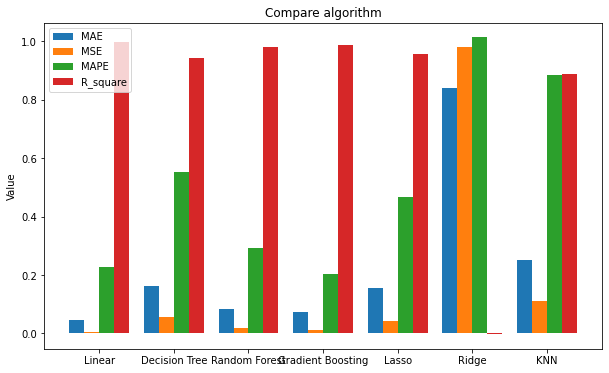

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(algorithm))
width = 0.2

rects1 = ax.bar(x - 1.5*width, MAE, width, label='MAE')
rects2 = ax.bar(x - 0.5*width, MSE, width, label='MSE')
rects3 = ax.bar(x + 0.5*width, MAPE, width, label='MAPE')
rects4 = ax.bar(x + 1.5*width, R_square, width, label='R_square')

# Thêm tiêu đề và nhãn trục
ax.set_ylabel('Value')
ax.set_title('Compare algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algorithm)
ax.legend()

# Hiển thị biểu đồ
plt.show()


**Problem 2: Predict condition**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop('condition_index', axis=1), df['condition_index'], test_size=0.3, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#Createmodel
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree_model = DecisionTreeClassifier()
LogisticRegression_model = LogisticRegression()
KNN_model_5 = KNeighborsClassifier(n_neighbors=5)
KNN_model_6 = KNeighborsClassifier(n_neighbors=6)
KNN_model_7 = KNeighborsClassifier(n_neighbors=7)



In [ ]:
#Trainmodel
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
LogisticRegression_model.fit(X_train, y_train)
KNN_model_5.fit(X_train, y_train)
KNN_model_6.fit(X_train, y_train)
KNN_model_7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Evualte model
y_predict_decision_tree = decision_tree_model.predict(X_test)
y_predict_random_forest = random_forest_model.predict(X_test)
y_predict_logistic_regression = LogisticRegression_model.predict(X_test)
y_predict_knn_5 = KNN_model_5.predict(X_test)
y_predict_knn_6 = KNN_model_6.predict(X_test)
y_predict_knn_7 = KNN_model_7.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score,  f1_score

In [ ]:
algorithm = ['Random Forest',
             'Decision Tree', 
             'Logistic Regression',
             'KNN_5',
             'KNN_6',
             'KNN_7']

accurancy = [accuracy_score(y_test, y_predict_decision_tree),
       accuracy_score(y_test, y_predict_random_forest),
       accuracy_score(y_test, y_predict_logistic_regression),
       accuracy_score(y_test, y_predict_knn_5),
       accuracy_score(y_test, y_predict_knn_6),
       accuracy_score(y_test, y_predict_knn_7)]

precision =  [precision_score(y_test, y_predict_decision_tree, average='macro'),
       precision_score(y_test, y_predict_random_forest, average='macro'),
       precision_score(y_test, y_predict_logistic_regression, average='macro'),
       precision_score(y_test, y_predict_knn_5, average='macro'),
       precision_score(y_test, y_predict_knn_6, average='macro'),
       precision_score(y_test, y_predict_knn_7, average='macro')]

recall = [recall_score(y_test, y_predict_decision_tree, average='macro'),
       recall_score(y_test, y_predict_random_forest, average='macro'),
       recall_score(y_test, y_predict_logistic_regression, average='macro'),
       recall_score(y_test, y_predict_knn_5, average='macro'),
       recall_score(y_test, y_predict_knn_6, average='macro'),
       recall_score(y_test, y_predict_knn_7, average='macro')]

f1score =  [f1_score(y_test, y_predict_decision_tree, average='macro'),
       f1_score(y_test, y_predict_random_forest, average='macro'),
       f1_score(y_test, y_predict_logistic_regression, average='macro'),
       f1_score(y_test, y_predict_knn_5, average='macro'),
       f1_score(y_test, y_predict_knn_6, average='macro'),
       f1_score(y_test, y_predict_knn_7, average='macro')]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

In [ ]:
print(accurancy)
print(recall)
print(f1score)
print(precision)

[0.7767857142857143, 0.7991071428571429, 0.7857142857142857, 0.7455357142857143, 0.7366071428571429, 0.7366071428571429]
[0.8088582733489478, 0.6130189620146579, 0.5694218608852756, 0.5685752328865671, 0.5692588709446672, 0.4899888410648812]
[0.8056940503355046, 0.6179008753148285, 0.5736851743906879, 0.5802907547948911, 0.5759776479655998, 0.5121407935417598]
[0.8031045062440052, 0.6639951043823326, 0.6261519094852428, 0.6186755055577876, 0.6141217985902371, 0.5818967084924532]


In [ ]:
data = {'algorithm': algorithm,
        'accurancy': accurancy, 
        'precision': precision, 
        'recall': recall,
        'f1score': f1score}

data_Algorithm = pd.DataFrame(data)

data_Algorithm

,algorithm,accurancy,precision,recall,f1score
0,Random Forest,0.776786,0.803105,0.808858,0.805694
1,Decision Tree,0.799107,0.663995,0.613019,0.617901
2,Logistic Regression,0.785714,0.626152,0.569422,0.573685
3,KNN_5,0.745536,0.618676,0.568575,0.580291
4,KNN_6,0.736607,0.614122,0.569259,0.575978
5,KNN_7,0.736607,0.581897,0.489989,0.512141
